In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [2]:
# loans_tr 데이터를 load
df = pd.read_csv('loans_tr.csv')
df.head(10)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
# Exploratory Data Aanalysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [4]:
df.describe()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000
mean,4798.572511,0.803567,0.122617,318.093373,10.932431,12.622325,710.749709,4547.756538,1.706579e+04,46.757076,1.571695,0.164607,0.062252,0.159594
std,2766.006017,0.397323,0.026817,206.994270,0.615859,6.881663,38.088227,2494.931515,3.450448e+04,29.000330,2.197341,0.550745,0.264656,0.366251
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2399.250000,1.000000,0.103900,163.570000,10.555813,7.242500,682.000000,2792.781250,3.193250e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,4804.500000,1.000000,0.122100,267.740000,10.928884,12.660000,707.000000,4110.041667,8.690000e+03,46.200000,1.000000,0.000000,0.000000,0.000000
75%,7193.500000,1.000000,0.140700,430.750000,11.294022,17.960000,737.000000,5729.958333,1.843375e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,9576.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df = df.set_index('Unnamed: 0')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE8DBF9160>,
      dtype=object)

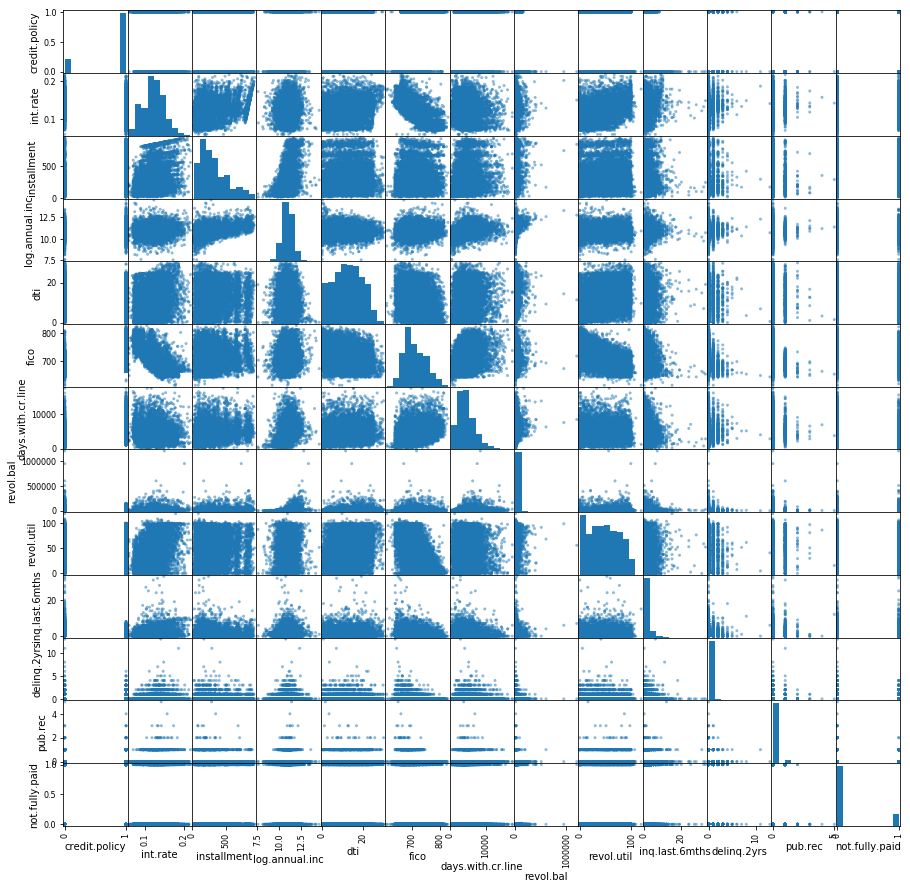

In [6]:
plt.rcParams['figure.figsize'] = (15,15)
scatter_matrix(df)

In [7]:
# Object type data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8578 entries, 0 to 9576
Data columns (total 14 columns):
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1005.2+ KB


In [16]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [17]:
df.purpose.value_counts()

debt_consolidation    3547
all_other             2082
credit_card           1143
home_improvement       556
small_business         547
major_purchase         395
educational            308
Name: purpose, dtype: int64

In [12]:
df_1 = pd.get_dummies(df)

In [13]:
df_1.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

In [18]:
len(df_1.columns)

20

In [26]:
x = df_1.drop('not.fully.paid',axis=1)
y = df_1['not.fully.paid']

In [29]:
# X_data, y_data division
minmax = MinMaxScaler()
x_data = minmax.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=0.3)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
# train data, test data division

In [ ]:
# Compare Algorithms - model selection

In [34]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('SVC',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RF',RandomForestClassifier()))

In [35]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

In [57]:
# cross validaton을 통해 optimal model selection
for i,j in models:
    name=i
    i=j
    i.fit(x_train,y_train)
    print(name,':',cross_val_score(i,x_test,y_test,cv=5).mean())

LR : 0.8449916377700447
SVC : 0.8461544255392548
KNN : 0.8259549414761042
CART : 0.7385338467517034
NB : 0.7746504306746098
RF : 0.8372231276057842


In [61]:
# pipeline을 활용해서 scaling하고 optimal model selection
pipelines=[]
pipelines.append(['ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])])
pipelines.append(['ScaledSVC',Pipeline([('Scaler',StandardScaler()),('SVC',SVC())])])
pipelines.append(['ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])])
pipelines.append(['ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])])
pipelines.append(['ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])])
pipelines.append(['ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestClassifier())])])

In [62]:
pipelines

[['ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])],
 ['ScaledSVC', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])],
 ['ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

In [63]:
for i,j in pipelines:
    name=i
    i=j
    i.fit(x_train,y_train)
    print(name,':',i.score(x_test,y_test))

ScaledLR : 0.8453768453768454
ScaledSVC : 0.8473193473193473
ScaledKNN : 0.8216783216783217
ScaledCART : 0.7354312354312355
ScaledNB : 0.778943278943279
ScaledRF : 0.837995337995338


In [79]:
# ensemble 과 grid search를 활용한 model selection
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('lr',LogisticRegression()),('kn',KNeighborsClassifier()),('dt',DecisionTreeClassifier()),('svc',SVC())], voting='hard') # 또는 voting='soft'
params = {
    'lr__solver':['liblinear'], 'lr__penalty':['l2'], 'lr__C':[0.1,1,5,7,10,20,100],
    'kn__n_neighbors':[3,5,7,10,20],
    'dt__max_depth':[2,3,4,5,6,7,8,10],
    'svc__C':[0.1,1,4,8], 'svc__gamma':[0.1,1,10]
}
grid_vote = GridSearchCV(vote, param_grid = params)
grid_vote.fit(x_train, y_train)
pred_grid_vote = grid_vote.predict(x_test)

KeyboardInterrupt: 

In [ ]:
# final test score - test data

In [65]:
test_data = pd.read_csv('loans_ts.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
Unnamed: 0           1000 non-null int64
credit.policy        1000 non-null int64
purpose              1000 non-null object
int.rate             1000 non-null float64
installment          1000 non-null float64
log.annual.inc       1000 non-null float64
dti                  1000 non-null float64
fico                 1000 non-null int64
days.with.cr.line    1000 non-null float64
revol.bal            1000 non-null int64
revol.util           1000 non-null float64
inq.last.6mths       1000 non-null int64
delinq.2yrs          1000 non-null int64
pub.rec              1000 non-null int64
not.fully.paid       1000 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 117.3+ KB


In [67]:
x = test_data.drop('not.fully.paid',axis=1)
y = test_data['not.fully.paid']

In [69]:
x = pd.get_dummies(x)

In [81]:
del x['Unnamed: 0']

In [82]:
for i,j in pipelines:
    name=i
    i=j
    i.fit(x_train,y_train)
    print(name,':',i.score(x,y))

ScaledLR : 0.172
ScaledSVC : 0.836
ScaledKNN : 0.189
ScaledCART : 0.17
ScaledNB : 0.201
ScaledRF : 0.448
